In [51]:
# Create GAN for MDP process with two states

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary


class GAN:
    def __init__(self, seq_len=16, latent_dim=25):
        # self.P = np.random.uniform(0, 1, (6, 6))
        # print(self.P, np.sum(self.P, axis=1, keepdims=True))
        # self.P = self.P / np.sum(self.P, axis=1, keepdims=True)
        self.states = [0, 1, 2, 3]
        self.actions = [0, 1, 2, 3, 4, 5, 6, 7]
        self.latent_dim = latent_dim
        self.seq_len = seq_len
        # print(self.P)
        self.build_generator()
        self.build_discriminator()
        self.build_gan()
        # print(self.P)

    def generate_real_samples(self, n_samples):
        X_total = []
        for i in range(n_samples):
            current_state = np.random.choice([0, 1, 2, 3])
            X = []
            while len(X) < self.seq_len:
                if current_state == 0:
                    ac = np.random.choice([0, 1])
                    if ac == 0:
                        next_state = np.random.choice([0, 1], p=[0.9, 0.1])
                        if next_state == 1:
                            reward = -1
                        else:
                            reward = 1
                    else:
                        next_state = 1
                        reward = 10

                    ac = tf.keras.utils.to_categorical(ac, num_classes=8)
                    current_state_cat = tf.keras.utils.to_categorical(
                        current_state, num_classes=4
                    )
                    current_state = next_state
                    X.append(np.concatenate([current_state_cat, ac, [reward/10]]))
                elif current_state == 1:
                    ac = np.random.choice([2, 3])
                    if ac == 2:
                        next_state = np.random.choice([1, 2], p=[0.9, 0.1])
                        if next_state == 1:
                            reward = -2
                        else:
                            reward = 2
                    else:
                        next_state = 2
                        reward = 10

                    ac = tf.keras.utils.to_categorical(ac, num_classes=8)
                    current_state_cat = tf.keras.utils.to_categorical(
                        current_state, num_classes=4
                    )
                    current_state = next_state
                    X.append(np.concatenate([current_state_cat, ac, [reward/10]]))

                elif current_state == 2:
                    ac = np.random.choice([4, 5])
                    if ac == 4:
                        next_state = np.random.choice([2, 3], p=[0.9, 0.1])
                        if next_state == 3:
                            reward = -3
                        else:
                            reward = 3
                    else:
                        next_state = 3
                        reward = 10
                    ac = tf.keras.utils.to_categorical(ac, num_classes=8)
                    current_state_cat = tf.keras.utils.to_categorical(
                        current_state, num_classes=4
                    )
                    current_state = next_state
                    X.append(np.concatenate([current_state_cat, ac, [reward/10]]))
                elif current_state == 3:
                    ac = np.random.choice([6, 7])
                    if ac == 6:
                        next_state = np.random.choice([3, 0], p=[0.9, 0.1])
                        if next_state == 2:
                            reward = -4
                        else:
                            reward = 4
                    else:
                        next_state = 0
                        reward = 10

                    ac = tf.keras.utils.to_categorical(ac, num_classes=8)
                    current_state_cat = tf.keras.utils.to_categorical(
                        current_state, num_classes=4
                    )
                    current_state = next_state
                    X.append(np.concatenate([current_state_cat, ac, [reward/10]]))
            X = np.array(X)
            # X = tf.keras.utils.to_categorical(X, num_classes=6)
            X_total.append(X)
        X = np.array(X_total)
        y = np.ones((n_samples, 1)) * 0.9
        # print(X.shape, y.shape)
        return X, y

    def generate_fake_samples(self, n_samples):
        X = self.generator.predict(np.random.normal(0, 1, (n_samples, 25)))
        y = np.zeros((n_samples, 1))
        return X, y

    def calculate_P(self, n_samples):
        X, _ = self.generate_fake_samples(n_samples)
        X1 = np.argmax(X[:, :, :4], axis=2)
        X2 = np.argmax(X[:, :, 4:12], axis=2)
        X3 = X[:, :, 12]
        # X1 = np.argmax(X1, axis=1)
        # X2 = np.argmax(X2, axis=1)
        print("Probabilitity of starting position being 0:", np.mean(X1[:, 0] == 0))
        print("Probabilitity of starting position being 1:", np.mean(X1[:, 0] == 1))
        print("Probabilitity of starting position being 2:", np.mean(X1[:, 0] == 2))
        print("Probabilitity of starting position being 3:", np.mean(X1[:, 0] == 3))
        print(
            "Probability of action 0 being taken in state 0:", np.mean(X2[X1 == 0] == 0)
        )
        print(
            "Probability of action 1 being taken in state 0:", np.mean(X2[X1 == 0] == 1)
        )
        print(
            "Probability of action 2 being taken in state 1:", np.mean(X2[X1 == 1] == 2)
        )
        print(
            "Probability of action 3 being taken in state 1:", np.mean(X2[X1 == 1] == 3)
        )
        print(
            "Probability of action 4 being taken in state 2:", np.mean(X2[X1 == 2] == 4)
        )
        print(
            "Probability of action 5 being taken in state 2:", np.mean(X2[X1 == 2] == 5)
        )
        print(
            "Probability of action 6 being taken in state 3:", np.mean(X2[X1 == 3] == 6)
        )
        print(
            "Probability of action 7 being taken in state 3:", np.mean(X2[X1 == 3] == 7)
        )

    def calculate_final_P(self, n_samples):
        X, _ = self.generate_fake_samples(n_samples)
        X1 = np.argmax(X[:, :, :4], axis=2)
        X2 = np.argmax(X[:, :, 4:12], axis=2)
        # X1 = np.argmax(X1, axis=1)
        # X2 = np.argmax(X2, axis=1)
        print("Probabilitity of starting position being 0:", np.mean(X1[:, 0] == 0))
        print("Probabilitity of starting position being 1:", np.mean(X1[:, 0] == 1))
        print("Probabilitity of starting position being 2:", np.mean(X1[:, 0] == 2))
        print("Probabilitity of starting position being 3:", np.mean(X1[:, 0] == 3))
        print(
            "Probability of action 0 being taken in state 0:", np.mean(X2[X1 == 0] == 0)
        )
        print(
            "Probability of action 1 being taken in state 0:", np.mean(X2[X1 == 0] == 1)
        )
        print(
            "Probability of action 2 being taken in state 1:", np.mean(X2[X1 == 1] == 2)
        )
        print(
            "Probability of action 3 being taken in state 1:", np.mean(X2[X1 == 1] == 3)
        )
        print(
            "Probability of action 4 being taken in state 2:", np.mean(X2[X1 == 2] == 4)
        )
        print(
            "Probability of action 5 being taken in state 2:", np.mean(X2[X1 == 2] == 5)
        )
        print(
            "Probability of action 6 being taken in state 3:", np.mean(X2[X1 == 3] == 6)
        )
        print(
            "Probability of action 7 being taken in state 3:", np.mean(X2[X1 == 3] == 7)
        )
        ps = np.zeros((4, 8, 4))
        for i in range(n_samples):
            for j in range(self.seq_len - 1):
                ps[X1[i, j], X2[i, j], X1[i, j + 1]] += 1
        ps = ps / np.sum(ps, axis=2, keepdims=True)
        print(ps)

    # def calculate_P_real(self, n_samples):
    #     X, _ = self.generate_real_samples(n_samples)
    #     X = np.argmax(X, axis=2)
    #     P = np.zeros((6, 6))
    #     for i in range(n_samples):
    #         for j in range(self.seq_len - 1):
    #             P[X[i, j], X[i, j + 1]] += 1

    #     P = P / np.sum(P, axis=1, keepdims=True)
    #     return P

    def build_generator(self):
        tcn_layer1 = TCN(nb_filters=500, dilations=(1,), return_sequences=True)

        print(tcn_layer1.receptive_field)
        inp = tf.keras.layers.Input(shape=(self.latent_dim,))
        x = tf.keras.layers.Dense(16 * 3000)(inp)
        x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
        x = tf.keras.layers.Reshape((16, 3000))(x)
        # x = tcn_layer1(x)
        y1 = tf.keras.layers.Dense(4, activation="softmax")(x)
        y2 = tf.keras.layers.Dense(8, activation="softmax")(x)
        y3 = tf.keras.layers.Dense(1, activation="tanh")(x)
        y = tf.keras.layers.Concatenate()([y1, y2, y3])
        self.generator = tf.keras.models.Model(inputs=inp, outputs=y)

        # self.generator = tf.keras.models.Sequential(
        #     [
        #         tf.keras.layers.Dense(4 * 2000, input_shape=(25,)),
        #         tf.keras.layers.LeakyReLU(alpha=0.2),
        #         tf.keras.layers.Reshape((4, 2000)),
        #         tf.keras.layers.Conv1DTranspose(100, 3, strides=2, padding="same"),
        #         tf.keras.layers.LeakyReLU(alpha=0.2),
        #         tf.keras.layers.Conv1DTranspose(50, 3, strides=2, padding="same"),
        #         tf.keras.layers.LeakyReLU(alpha=0.2),
        #         tf.keras.layers.Conv1DTranspose(
        #             5, 3, strides=1, padding="same", activation="sigmoid"
        #         ),
        #     ]
        # )
        # inp = tf.keras.layers.Input(shape=(25,))
        # x = self.generator(inp)
        # y1 = tf.keras.layers.Conv1DTranspose(
        #     2, 3, strides=1, padding="same", activation="softmax"
        # )(x)
        # y2 = tf.keras.layers.Conv1DTranspose(
        #     3, 3, strides=1, padding="same", activation="softmax"
        # )(x)
        # y = tf.keras.layers.Concatenate()([y1, y2])
        # self.generator = tf.keras.models.Model(inputs=inp, outputs=y)

    def summarize_generator(self):
        self.generator.summary()
        # tf.keras.utils.plot_model(self.generator, show_shapes=True, dpi=64)

    def build_discriminator(self):
        tcn_layer2 = TCN(nb_filters=500, dilations=(1, 2), return_sequences=False)
        self.discriminator = tf.keras.models.Sequential(
            [
                tf.keras.layers.Input(shape=(self.seq_len, 13)),
                # tcn_layer2,
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10000, activation="relu"),
                tf.keras.layers.Dense(1, activation="sigmoid"),
            ]
        )
        # self.discriminator = tf.keras.models.Sequential(
        #     [
        #         tf.keras.layers.Conv1D(
        #             50, 3, strides=2, padding="same", input_shape=(self.seq_len, 5)
        #         ),
        #         tf.keras.layers.LeakyReLU(alpha=0.2),
        #         tf.keras.layers.Conv1D(100, 3, strides=2, padding="same"),
        #         tf.keras.layers.LeakyReLU(alpha=0.2),
        #         tf.keras.layers.Conv1D(200, 3, strides=2, padding="same"),
        #         tf.keras.layers.LeakyReLU(alpha=0.2),
        #         tf.keras.layers.Flatten(),
        #         tf.keras.layers.Dense(1, activation="sigmoid"),
        #     ]
        # )
        self.discriminator.compile(
            loss="binary_crossentropy",
            # optimizer=tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.5),
            optimizer="adam",
            metrics=["accuracy"],
        )

    def summarize_discriminator(self):
        self.discriminator.summary()
        # tf.keras.utils.plot_model(self.discriminator, show_shapes=True, dpi=64)

    def build_gan(self):
        self.discriminator.trainable = False
        self.gan = tf.keras.models.Sequential(
            [
                self.generator,
                self.discriminator,
            ]
        )
        self.gan.compile(
            loss="binary_crossentropy",
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.5),
        )

    def show_episode(self, x):
        x1 = np.argmax(x[:, :4], axis=1)
        x2 = np.argmax(x[:, 4:12], axis=1)
        x3 = x[:, 12]
        for i in range(self.seq_len):
            print("State:", x1[i], "Action:", x2[i], "Reward:", x3[i] * 10)

    def train(self, epochs=10, batch_size=128, data_size=10000):
        l1_hist = []
        l2_hist = []
        l3_hist = []
        ac1_hist = []
        ac2_hist = []
        total = data_size // batch_size
        train_data_x, train_data_y = self.generate_real_samples(data_size)
        # X1 = np.argmax(train_data_x[:, :, :2], axis=2)
        # X2 = np.argmax(train_data_x[:, :, 2:], axis=2)
        # print("Probabilitity of starting position being 1:", np.mean(X1[:, 0] == 1))
        # print(
        #     "Probability of action 0 being taken in state 0:", np.mean(X2[X1 == 0] == 0)
        # )
        # print(
        #     "Probability of action 1 being taken in state 0:", np.mean(X2[X1 == 0] == 1)
        # )
        # print(
        #     "Probability of action 2 being taken in state 1:", np.mean(X2[X1 == 1] == 2)
        # )
        for i in range(epochs):
            print("Iteration:", i)
            # Train the discriminator

            for k in range(total):
                print(k, "/", total, end="\r")
                idx = np.random.randint(0, data_size, batch_size // 2)
                X_real, y_real = train_data_x[idx], train_data_y[idx]
                X_fake, y_fake = self.generate_fake_samples(batch_size // 2)

                l1, ac1 = self.discriminator.train_on_batch(X_real, y_real)
                l2, ac2 = self.discriminator.train_on_batch(X_fake, y_fake)

                X_fake = np.random.normal(0, 1, (batch_size, self.latent_dim))
                y_fake = np.ones((batch_size, 1))
                l3 = self.gan.train_on_batch(X_fake, y_fake)

                l1_hist.append(l1)
                l2_hist.append(l2)
                l3_hist.append(l3)
                ac1_hist.append(ac1)
                ac2_hist.append(ac2)

            # Show plots of the losses and accuracies
            calc_p = self.calculate_P(10000)
            # print(calc_p)
            # pred = gan.generator.predict(np.random.normal(0, 1, (1, gan.latent_dim)))
            # print(pred)
            # print(gan.discriminator.predict(pred))
            # print("Loss:",np.mean(np.abs(calc_p - (self.P))))
            if i % 10 >= 0:
                plt.figure(figsize=(10, 10))
                plt.subplot(2, 1, 1)
                plt.plot(l1_hist, label="Discriminator(Real)")
                plt.plot(l2_hist, label="Discriminator(Fake)")
                plt.plot(l3_hist, label="Generator")
                plt.legend()
                plt.title("Losses")
                plt.subplot(2, 1, 2)
                plt.plot(ac1_hist, label="Accuracy(Real)")
                plt.plot(ac2_hist, label="Accuracy(fake)")
                plt.legend()
                plt.title("Accuracies")
                plt.show()
                l1_hist = []
                l2_hist = []
                l3_hist = []
                ac1_hist = []
                ac2_hist = []

In [52]:
gan = GAN()

5


In [53]:
gan.summarize_discriminator()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 208)               0         
                                                                 
 dense_49 (Dense)            (None, 10000)             2090000   
                                                                 
 dense_50 (Dense)            (None, 1)                 10001     
                                                                 
Total params: 2,100,001
Trainable params: 0
Non-trainable params: 2,100,001
_________________________________________________________________


In [54]:
gan.summarize_generator()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 25)]         0           []                               
                                                                                                  
 dense_45 (Dense)               (None, 48000)        1248000     ['input_17[0][0]']               
                                                                                                  
 leaky_re_lu_8 (LeakyReLU)      (None, 48000)        0           ['dense_45[0][0]']               
                                                                                                  
 reshape_8 (Reshape)            (None, 16, 3000)     0           ['leaky_re_lu_8[0][0]']          
                                                                                            

Iteration: 0
313/313 [==============================] - 1s 2ms/step
Probabilitity of starting position being 0: 0.2575
Probabilitity of starting position being 1: 0.2009
Probabilitity of starting position being 2: 0.3184
Probabilitity of starting position being 3: 0.2232
Probability of action 0 being taken in state 0: 0.4102167575104576
Probability of action 1 being taken in state 0: 0.5306883001647864
Probability of action 2 being taken in state 1: 0.37312088458193565
Probability of action 3 being taken in state 1: 0.5719033420300659
Probability of action 4 being taken in state 2: 0.4148230591014401
Probability of action 5 being taken in state 2: 0.49523009130968065
Probability of action 6 being taken in state 3: 0.5112670020075339
Probability of action 7 being taken in state 3: 0.4307400807524869


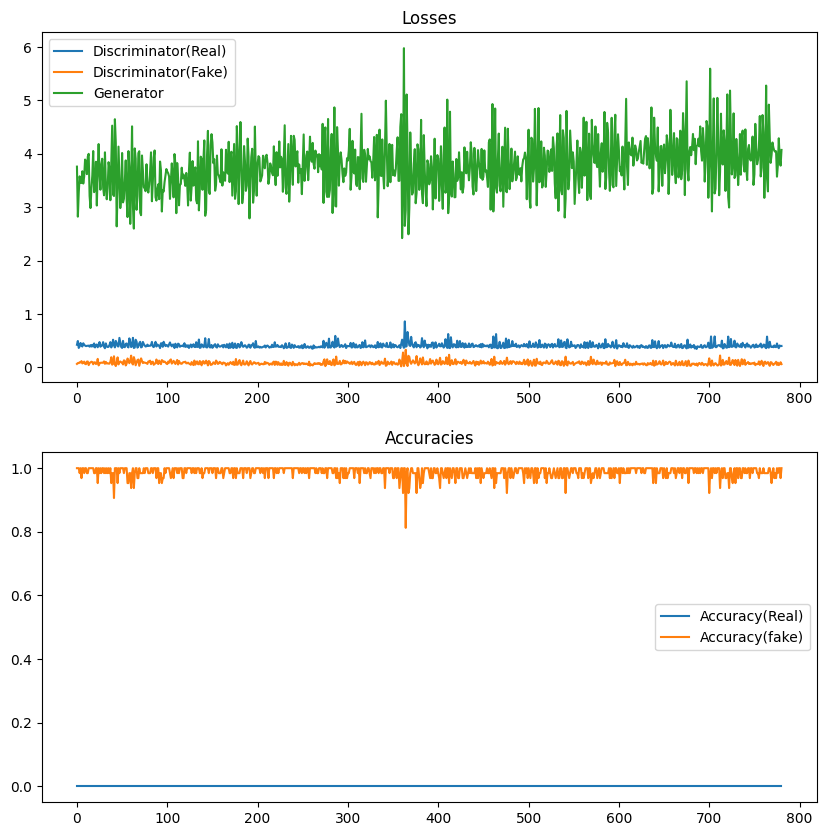

Iteration: 1
313/313 [==============================] - 1s 2ms/step
Probabilitity of starting position being 0: 0.2533
Probabilitity of starting position being 1: 0.2938
Probabilitity of starting position being 2: 0.2031
Probabilitity of starting position being 3: 0.2498
Probability of action 0 being taken in state 0: 0.42051400430901814
Probability of action 1 being taken in state 0: 0.5271622037550016
Probability of action 2 being taken in state 1: 0.40165637282425604
Probability of action 3 being taken in state 1: 0.5165637282425604
Probability of action 4 being taken in state 2: 0.39276262214983715
Probability of action 5 being taken in state 2: 0.5438975977198697
Probability of action 6 being taken in state 3: 0.5317598056230476
Probability of action 7 being taken in state 3: 0.4206872613675807


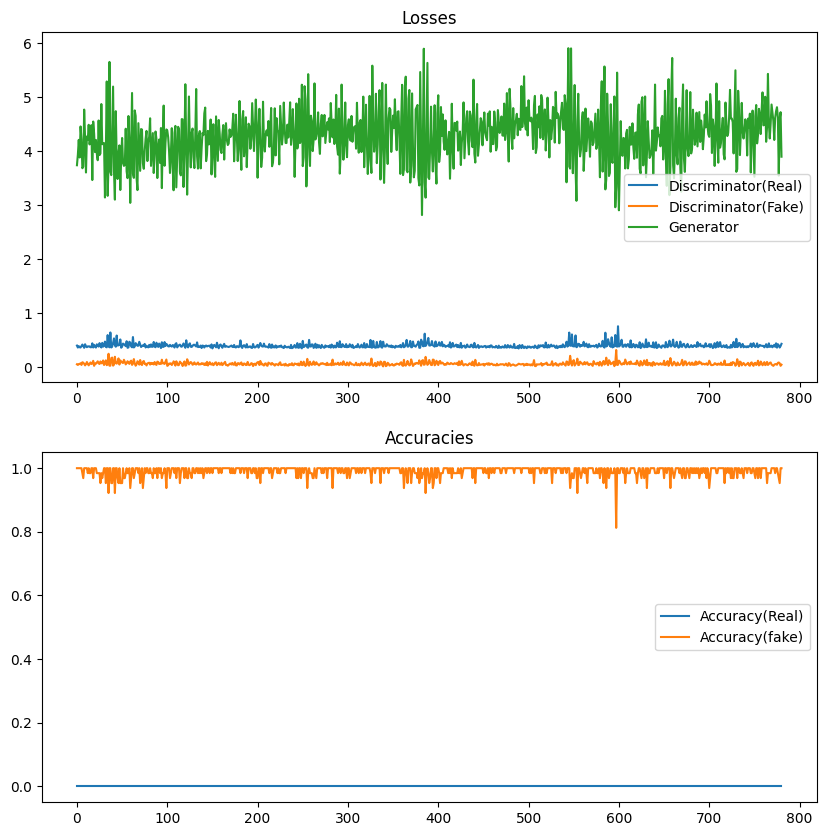

Iteration: 2
313/313 [==============================] - 1s 2ms/step
Probabilitity of starting position being 0: 0.2527
Probabilitity of starting position being 1: 0.2065
Probabilitity of starting position being 2: 0.2694
Probabilitity of starting position being 3: 0.2714
Probability of action 0 being taken in state 0: 0.41340796466993607
Probability of action 1 being taken in state 0: 0.5455619174775977
Probability of action 2 being taken in state 1: 0.35906873484649315
Probability of action 3 being taken in state 1: 0.563637425875617
Probability of action 4 being taken in state 2: 0.38387096774193546
Probability of action 5 being taken in state 2: 0.5464320625610948
Probability of action 6 being taken in state 3: 0.489760348583878
Probability of action 7 being taken in state 3: 0.44618736383442265


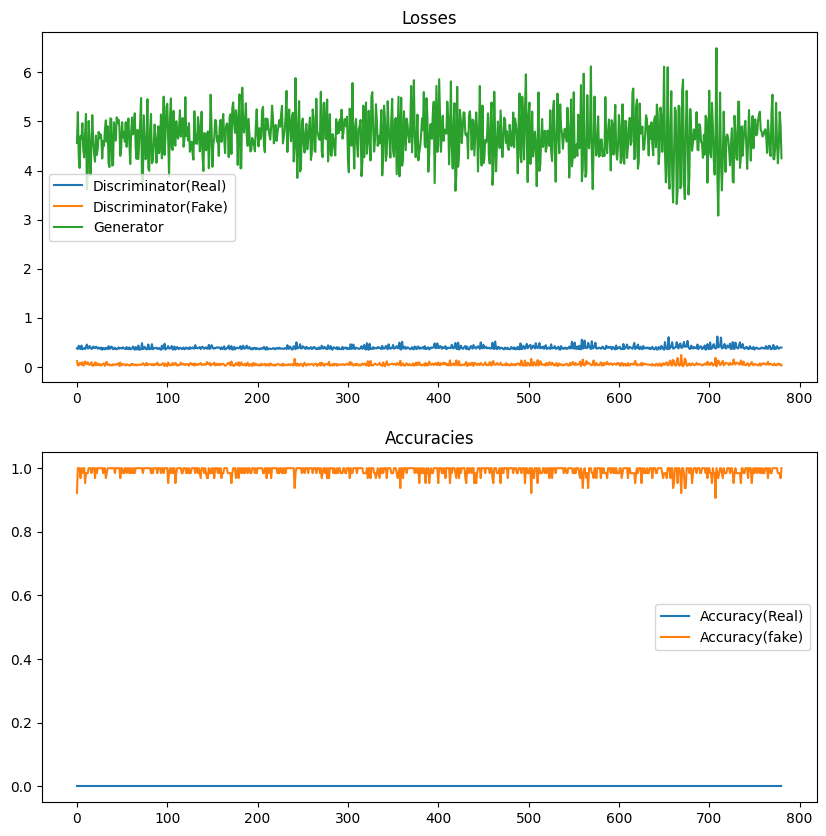

Iteration: 3
313/313 [==============================] - 1s 2ms/step
Probabilitity of starting position being 0: 0.2148
Probabilitity of starting position being 1: 0.2052
Probabilitity of starting position being 2: 0.2673
Probabilitity of starting position being 3: 0.3127
Probability of action 0 being taken in state 0: 0.4157989041522761
Probability of action 1 being taken in state 0: 0.5343685891609754
Probability of action 2 being taken in state 1: 0.351378868978357
Probability of action 3 being taken in state 1: 0.5778740982080521
Probability of action 4 being taken in state 2: 0.3788683305653669
Probability of action 5 being taken in state 2: 0.5328764239432996
Probability of action 6 being taken in state 3: 0.482756288882878
Probability of action 7 being taken in state 3: 0.4593589396808223


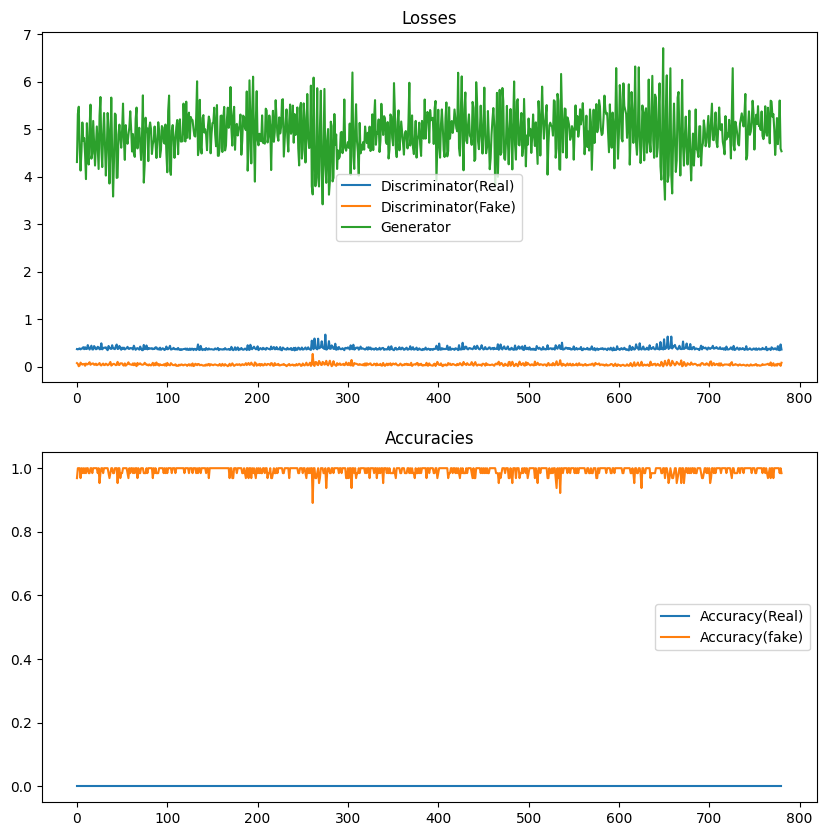

Iteration: 4
313/313 [==============================] - 1s 2ms/step
Probabilitity of starting position being 0: 0.2263
Probabilitity of starting position being 1: 0.237
Probabilitity of starting position being 2: 0.2694
Probabilitity of starting position being 3: 0.2673
Probability of action 0 being taken in state 0: 0.4168472300243426
Probability of action 1 being taken in state 0: 0.5443383356070941
Probability of action 2 being taken in state 1: 0.36982239748569395
Probability of action 3 being taken in state 1: 0.5551931686779138
Probability of action 4 being taken in state 2: 0.3670500998193745
Probability of action 5 being taken in state 2: 0.5264046011978325
Probability of action 6 being taken in state 3: 0.481800316144743
Probability of action 7 being taken in state 3: 0.45781176571111204


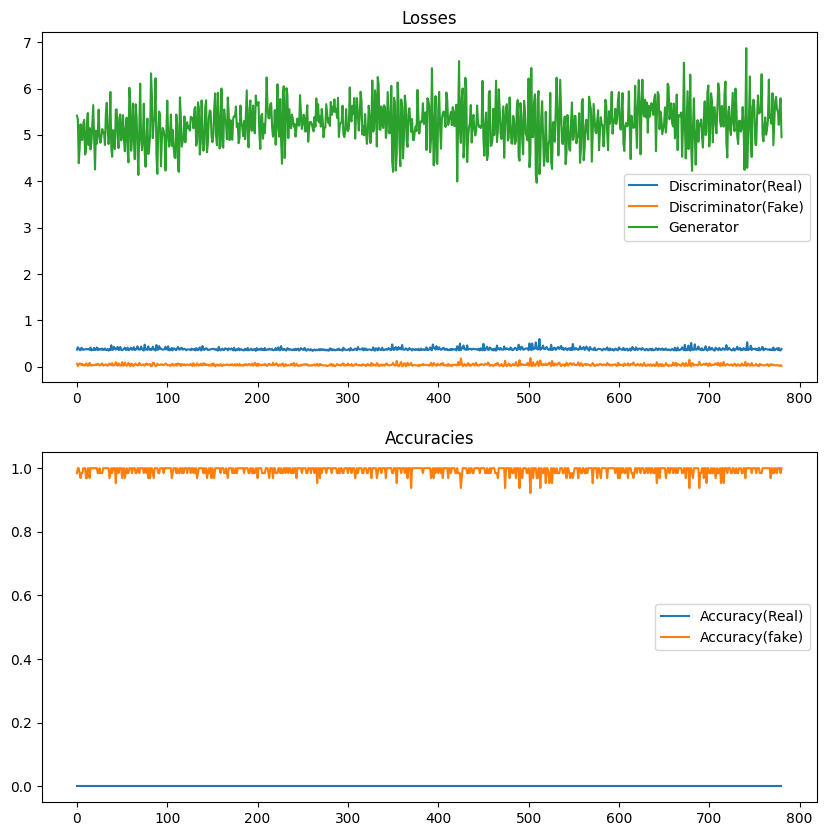

In [71]:
# tf.keras.config.disable_interactive_logging()
gan.train(epochs=5, batch_size=128, data_size=100000)

In [72]:
x, _ = gan.generate_real_samples(10)

In [73]:
gan.show_episode(x[0])

State: 2 Action: 5 Reward: 10.0
State: 3 Action: 6 Reward: 4.0
State: 3 Action: 7 Reward: 10.0
State: 0 Action: 1 Reward: 10.0
State: 1 Action: 2 Reward: -2.0
State: 1 Action: 3 Reward: 10.0
State: 2 Action: 5 Reward: 10.0
State: 3 Action: 6 Reward: 4.0
State: 3 Action: 7 Reward: 10.0
State: 0 Action: 1 Reward: 10.0
State: 1 Action: 2 Reward: -2.0
State: 1 Action: 2 Reward: -2.0
State: 1 Action: 3 Reward: 10.0
State: 2 Action: 5 Reward: 10.0
State: 3 Action: 7 Reward: 10.0
State: 0 Action: 1 Reward: 10.0


In [74]:
x, _ = gan.generate_fake_samples(10)

1/1 [==============================] - 0s 24ms/step


In [78]:
x = np.rint(x)
gan.show_episode(x[4])

State: 3 Action: 6 Reward: 4.0
State: 3 Action: 0 Reward: 4.0
State: 0 Action: 1 Reward: 7.0
State: 1 Action: 3 Reward: 10.0
State: 2 Action: 4 Reward: 3.0
State: 2 Action: 5 Reward: 12.0
State: 3 Action: 6 Reward: 4.0
State: 3 Action: 7 Reward: 8.0
State: 0 Action: 0 Reward: -1.0
State: 1 Action: 2 Reward: 1.0
State: 3 Action: 7 Reward: 8.0
State: 0 Action: 0 Reward: 2.0
State: 0 Action: 1 Reward: 11.0
State: 2 Action: 3 Reward: 9.0
State: 2 Action: 5 Reward: 11.0
State: 3 Action: 7 Reward: 10.0


In [79]:
gan.calculate_final_P(10000)

313/313 [==============================] - 1s 2ms/step
Probabilitity of starting position being 0: 0.2349
Probabilitity of starting position being 1: 0.2354
Probabilitity of starting position being 2: 0.2641
Probabilitity of starting position being 3: 0.2656
Probability of action 0 being taken in state 0: 0.42000212336766113
Probability of action 1 being taken in state 0: 0.5407155749017942
Probability of action 2 being taken in state 1: 0.36947624414259445
Probability of action 3 being taken in state 1: 0.5527611364849635
Probability of action 4 being taken in state 2: 0.36616651111589726
Probability of action 5 being taken in state 2: 0.5292076483116759
Probability of action 6 being taken in state 3: 0.4823682692923813
Probability of action 7 being taken in state 3: 0.4577201563467823
[[[6.47022880e-01 3.10136465e-01 4.07359631e-03 3.87670582e-02]
  [5.31953428e-02 9.03544631e-01 4.02587322e-02 3.00129366e-03]
  [9.29368030e-03 9.55390335e-01 2.41635688e-02 1.11524164e-02]
  [6.06060